In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
import numpy as np
sns.set()

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
with open('wiki.ms.vec', 'r') as fopen:
    v2w = fopen.read().split('\n')

data_vector, words = [], []
v2w = filter(None, v2w)
for i in v2w:
    vec = i.split(' ')
    words.append(vec[0])
    vec = vec[1:]
    vec = filter(None, vec)
    vec = [float(number) for number in vec]
    data_vector.append(vec)

In [4]:
X = np.array(data_vector)
X = StandardScaler().fit_transform(X)
X = Normalizer().fit_transform(X)

In [5]:
mean_vec = np.mean(X, axis = 0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0] - 1)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [7]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)
len(eig_pairs)

300

In [8]:
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

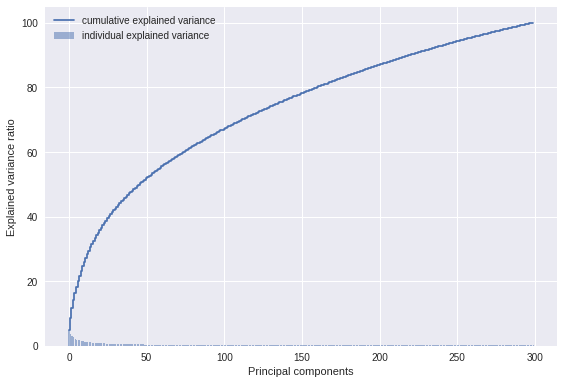

In [9]:
plt.bar(range(len(eig_pairs)), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(len(eig_pairs)), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 5).fit(X)
y = kmeans.labels_
unique_label = np.unique(y)

In [14]:
dict_word = {0: [], 1:[], 2:[], 3:[], 4:[]}
for i in xrange(len(words)):
    dict_word[y[i]].append(words[i])

In [15]:
_, X_, _, y_ = train_test_split(X, y, test_size = 0.3)

In [17]:
data_visual = PCA(n_components = 10).fit_transform(X_)

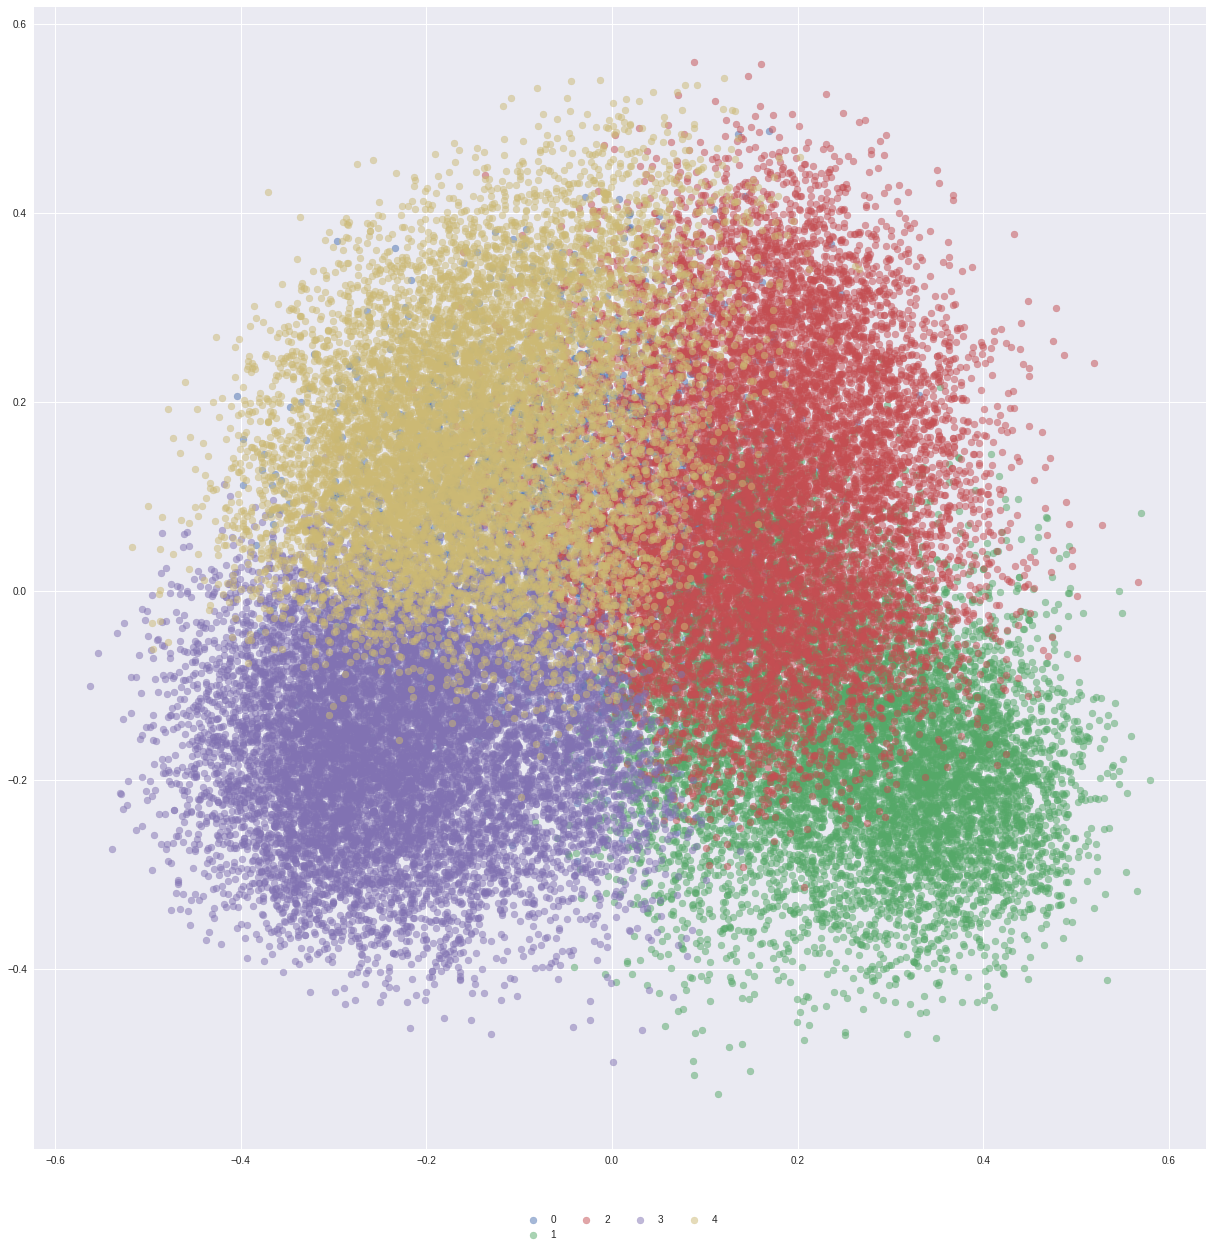

In [19]:
plt.rcParams["figure.figsize"] = [21, 21]
ax = plt.subplot(111)
current_palette = sns.color_palette()
for no, _ in enumerate(np.unique(y_)):
    ax.scatter(data_visual[y_ == no, 0], data_visual[y_ == no, 1], c = current_palette[no], label = unique_label[no], alpha = 0.5)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 1])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=4)
plt.show()